## Week 2 - Time Series Analysis and Forecasting

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()

%matplotlib inline

#### Data


In [2]:
#Veriyi okuyalım
df_ice_cream = pd.read_csv('ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
#Sütunları daha anlaşılır şekilde yeniden isimlendirelim 
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [5]:
#date sütununu datetime type'ına çevirelim
df_ice_cream['date'] = pd.to_datetime(df_ice_cream['date'] , format='%Y-%m-%d')

In [6]:
#şimdi date sütununu index olarak ayarlayalım
df_ice_cream.set_index('date', inplace=True)

In [7]:
#just get data from 2010 onwards
df_ice_cream = df_ice_cream.loc['2010-01-01':]

In [8]:
#show the result with the head() method
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


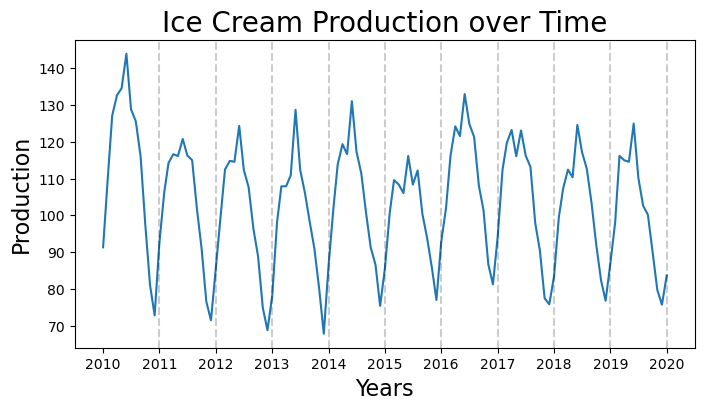

In [9]:
plt.figure(figsize=(8,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
plt.xlabel('Years', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### ACF
ACF plot is a bar chart of coefficients of correlation between a time series and it lagged values.

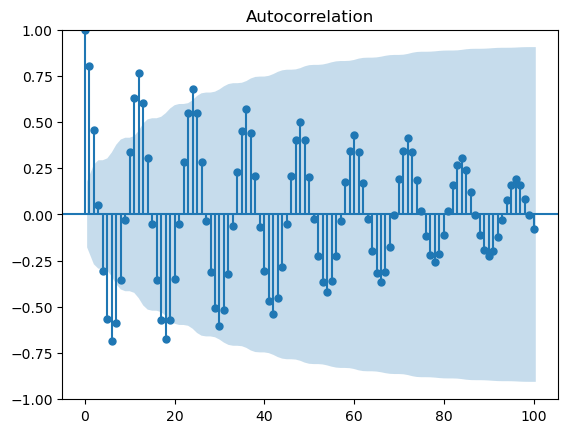

In [10]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

#### Azalarak ilerliyen ACF değerlerinden Auto Regressive bir süreç ile karşılaştığımızı söyleyebiliriz.
A statistical model is autoregressive if it predicts future values based on past values.

### PACF
The partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags.

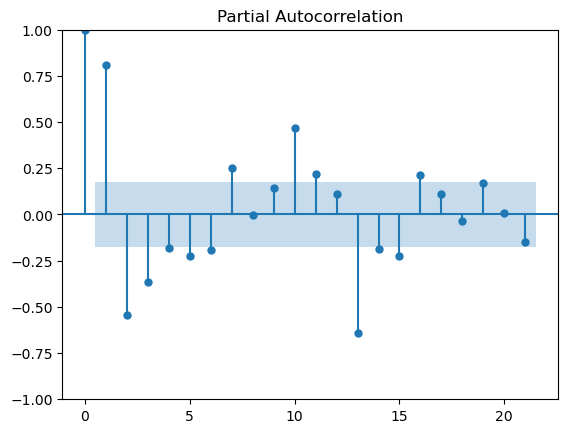

In [11]:
pacf_plot = plot_pacf(df_ice_cream.production, method='yw')

#### Elde ettiğimiz bu PACF degerlerinden Auto Regressive modeline 1, 2, 3, 10 ve 13 lü laglar ile başlamanın mantıklı olacağını anlıyoruz.

## AR Model

$y_{t,t-1,t-2,...0}$: zaman serisi

$y_t$: tahmin edilmek istenen değer

$\beta$: regresyon parametreleri

$\varepsilon_t$: hata terimi

p: otoregresyon modelinin mertebesi 

$y_t = \beta_0 + \beta_1y_{t-1} + \beta_2y_{t-2} ... \beta_py_{t-p} + \varepsilon_t$

In [12]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


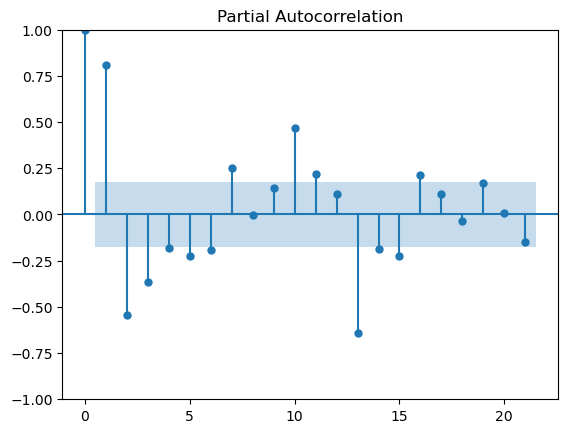

In [13]:
pacf_plot = plot_pacf(df_ice_cream.production, method='yw')

In [14]:
# Eğitim ve test verilerini ayıralım. 
train = df_ice_cream[df_ice_cream.index < '2019-01-01']
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
test = df_ice_cream[df_ice_cream.index >= '2019-01-01']

In [15]:
# AR modelini oluşturalım
model = ARIMA(train, order=(13,0,0), enforce_stationarity=False, enforce_invertibility=False)

In [16]:
# Şimdi modeli eğitelim
model_fit = model.fit(method_kwargs={"warn_convergence": False})

In [17]:
#modelin özetini yazdıralım
display(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:                ARIMA(13, 0, 0)   Log Likelihood                -259.655
Date:                Sun, 02 Jul 2023   AIC                            549.311
Time:                        23:46:25   BIC                            587.619
Sample:                    01-01-2010   HQIC                           564.790
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.6003      1.304     78.668      0.000     100.044     105.157
ar.L1          0.8077      0.082      9.876      0.000       0.647       0.968
ar.L2          0.0591      0.111      0.531      0.595      -0.159       0.277
ar.L3         -0.2348      0.102     -2.291      0.022      -0.436      -0.034
ar.L4          0.0809      0.113      0.715      0.475      -0.141       0.303
ar.L5          0.0722      0.124      0.582      0.560      -0.171       0.315
ar.L6         -0.2514      0.101     -2.478      0.013      -0.450      -0.053
ar.L7          0.0590      0.113      0.522      0.602      -0.163       0.281
ar.L8          0.0944      0.122      0.772      0.440      -0.145       0.334
ar.L9         -0.2258      0.099     -2.280      0.023      -0.420      -0.032
ar.L10         0.0988      0.110      0.896      0.370      -0.117       0.315
ar.L11         0.0618      0.116      0.534      0.593      -0.165       0.288
ar.L12         0.6170      0.106      5.808      0.000       0.409       0.825
ar.L13        -0.5919      0.090     -6.601      0.000      -0.768      -0.416
sigma2        13.8585      2.399      5.778      0.000       9.157      18.560
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 3.06
Prob(Q):                              0.43   Prob(JB):                         0.22
Heteroskedasticity (H):               0.76   Skew:                             0.44
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start_date = test.index[0]
end_date = test.index[-1]

predictions = model_fit.predict(start = start_date, end = end_date)
residuals = test.production - predictions.values

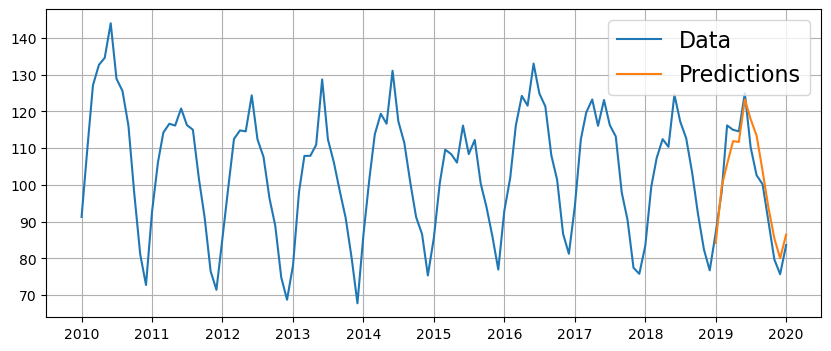

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.plot(predictions)
plt.grid()
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

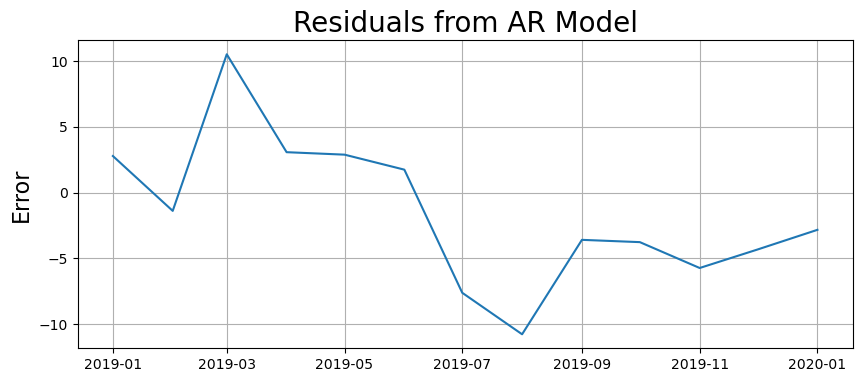

In [20]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.grid()
plt.show()

In [21]:
print(f'Mean Absolute Percent Error: {round(np.mean(abs(residuals/test.production)),4)}')
print(f'Root Mean Squared Error: {np.sqrt(np.mean(residuals**2))}')

Mean Absolute Percent Error: 0.0475
Root Mean Squared Error: 5.564733386529518


### MA Model    

$y_t$: tahmin edilmek istenen değer

$\mu$: serinin ortalama

$\phi$: hata parametreleri

q: MA modelinin mertebesi

$\varepsilon_t$: hata terimi

$y_t = \mu + \phi_1\varepsilon_{t-1} + \phi_2\varepsilon_{t-2} ... + \phi_q\varepsilon_{t-q} + \varepsilon_t$

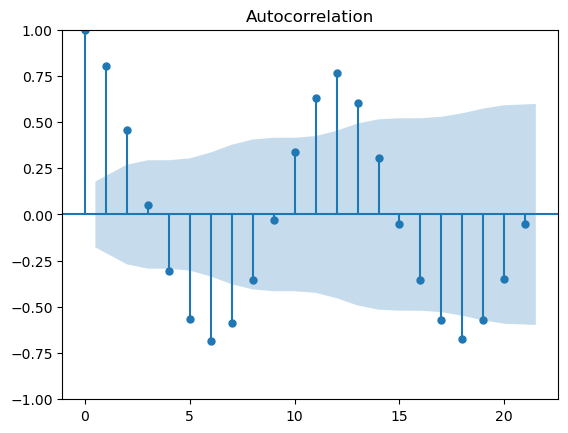

In [22]:
acf_plot = plot_acf(df_ice_cream.production)

In [23]:
model = ARIMA(train, order=(0,0,18), enforce_stationarity=False, enforce_invertibility=False)

In [24]:
#fit the model
model_fit = model.fit(method_kwargs={"warn_convergence": False})

In [25]:
#summary of the model
display(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:                ARIMA(0, 0, 18)   Log Likelihood                -283.047
Date:                Sun, 02 Jul 2023   AIC                            606.095
Time:                        23:46:51   BIC                            655.867
Sample:                    01-01-2010   HQIC                           626.157
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.6956      3.426     30.263      0.000      96.980     110.411
ma.L1          0.7998      2.316      0.345      0.730      -3.739       5.339
ma.L2          1.2474      1.334      0.935      0.350      -1.368       3.863
ma.L3          0.9784      2.312      0.423      0.672      -3.554       5.511
ma.L4          0.3497      1.284      0.272      0.785      -2.167       2.867
ma.L5         -0.3959      3.770     -0.105      0.916      -7.786       6.994
ma.L6         -1.2796      6.074     -0.211      0.833     -13.184      10.624
ma.L7         -1.3175      7.265     -0.181      0.856     -15.556      12.922
ma.L8         -0.7829      3.317     -0.236      0.813      -7.284       5.718
ma.L9         -0.6755      3.069     -0.220      0.826      -6.691       5.340
ma.L10        -0.4082      7.797     -0.052      0.958     -15.690      14.873
ma.L11        -0.6252      9.564     -0.065      0.948     -19.370      18.119
ma.L12         0.3251      7.069      0.046      0.963     -13.530      14.180
ma.L13         0.6510      2.654      0.245      0.806      -4.550       5.852
ma.L14         1.2578      2.946      0.427      0.669      -4.517       7.032
ma.L15         1.9233      6.109      0.315      0.753     -10.051      13.897
ma.L16         2.0782      5.899      0.352      0.725      -9.484      13.641
ma.L17         1.6291      3.863      0.422      0.673      -5.943       9.201
ma.L18         0.4730      1.128      0.419      0.675      -1.737       2.683
sigma2        11.7867     27.351      0.431      0.667     -41.819      65.393
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.55   Prob(JB):                         0.85
Heteroskedasticity (H):               0.67   Skew:                             0.12
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
predictions = model_fit.predict(start = start_date, end = end_date)
residuals = test.production - predictions.values

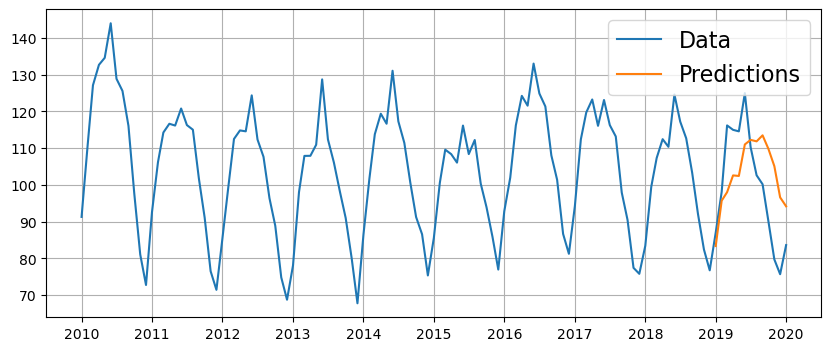

In [27]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.plot(predictions)
plt.grid()
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

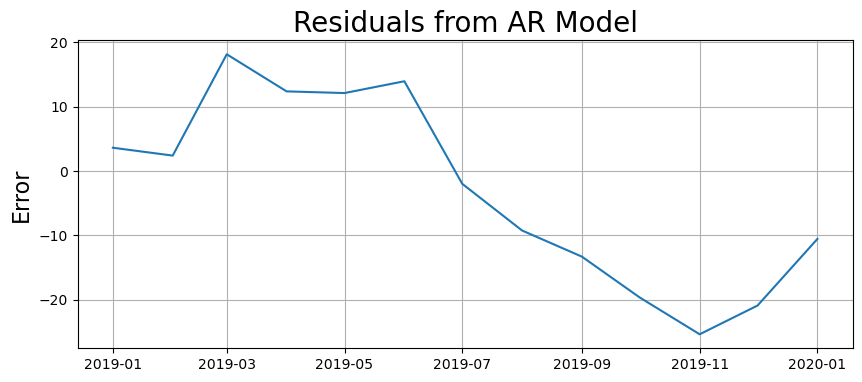

In [28]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.grid()
plt.show()

### ARMA Model

#### ARMA(1,1) modeli için

$y_t$: tahmin edilmek istenen değer

$\beta$: ar parametreleri

$\phi$: ma parametreleri

$\varepsilon_t$: hata terimi


$y_t = \beta_0 + \beta_1y_{t-1} + \phi_1\varepsilon_{t-1} + \varepsilon_t$

In [29]:
model = ARIMA(train, order=(13,0,18), enforce_stationarity=False, enforce_invertibility=False)

In [30]:
model_fit = model.fit(method_kwargs={"warn_convergence": False})

In [31]:
#summary of the model
display(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:               ARIMA(13, 0, 18)   Log Likelihood                -229.254
Date:                Sun, 02 Jul 2023   AIC                            524.507
Time:                        23:47:08   BIC                            606.632
Sample:                    01-01-2010   HQIC                           557.610
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.0408      2.274     45.762      0.000      99.585     108.497
ar.L1          0.7750      0.461      1.682      0.093      -0.128       1.678
ar.L2          0.2700      0.736      0.367      0.714      -1.172       1.712
ar.L3         -0.5657      0.780     -0.725      0.469      -2.095       0.964
ar.L4          0.1373      0.750      0.183      0.855      -1.332       1.607
ar.L5          0.2965      0.689      0.430      0.667      -1.055       1.648
ar.L6         -0.6061      0.696     -0.871      0.384      -1.969       0.757
ar.L7          0.1341      0.717      0.187      0.852      -1.271       1.539
ar.L8          0.3342      0.736      0.454      0.650      -1.109       1.777
ar.L9         -0.5584      0.761     -0.734      0.463      -2.050       0.933
ar.L10         0.1155      0.738      0.156      0.876      -1.331       1.562
ar.L11         0.2732      0.683      0.400      0.689      -1.065       1.612
ar.L12         0.3860      0.705      0.547      0.584      -0.996       1.768
ar.L13        -0.5616      0.383     -1.468      0.142      -1.312       0.188
ma.L1         -0.3885      2.939     -0.132      0.895      -6.149       5.372
ma.L2         -0.0051      0.903     -0.006      0.995      -1.775       1.765
ma.L3          0.6905      0.950      0.727      0.467      -1.172       2.553
ma.L4         -0.0125      0.730     -0.017      0.986      -1.443       1.418
ma.L5         -0.0889      1.298     -0.068      0.945      -2.634       2.456
ma.L6          0.5908      2.461      0.240      0.810      -4.232       5.413
ma.L7         -0.0725      1.205     -0.060      0.952      -2.434       2.289
ma.L8          0.0060      1.750      0.003      0.997      -3.424       3.436
ma.L9          0.6767      1.642      0.412      0.680      -2.541       3.894
ma.L10         0.4201      1.388      0.303      0.762      -2.299       3.140
ma.L11        -0.0346      2.324     -0.015      0.988      -4.590       4.521
ma.L12        -0.1573      1.444     -0.109      0.913      -2.987       2.672
ma.L13         0.1716      0.502      0.342      0.732      -0.812       1.155
ma.L14         0.2718      0.749      0.363      0.717      -1.196       1.740
ma.L15        -0.1822      0.818     -0.223      0.824      -1.786       1.422
ma.L16         0.2890      2.159      0.134      0.894      -3.942       4.520
ma.L17         0.4159      1.362      0.305      0.760      -2.253       3.085
ma.L18         0.0182      0.387      0.047      0.962      -0.741       0.777
sigma2         6.3222     21.147      0.299      0.765     -35.125      47.769
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.93
Prob(Q):                              0.99   Prob(JB):                         0.38
Heteroskedasticity (H):               0.64   Skew:                             0.33
Prob(H) (two-sided):                  0.22   Kurtosis:       

In [32]:
predictions = model_fit.predict(start = start_date, end = end_date)
residuals = test.production - predictions.values

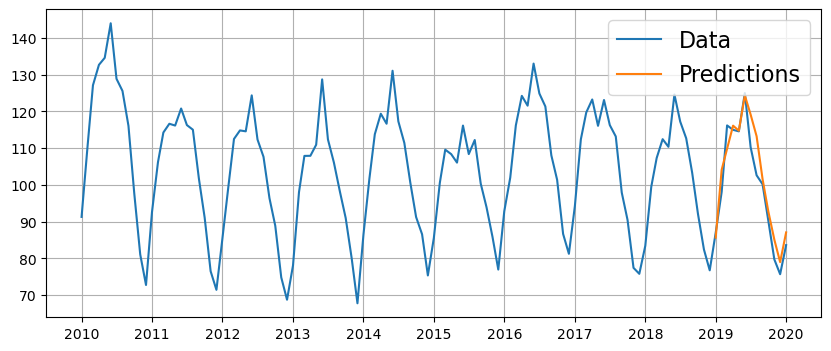

In [33]:
plt.figure(figsize=(10,4))

plt.plot(df_ice_cream.production)
plt.plot(predictions)
plt.grid()
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

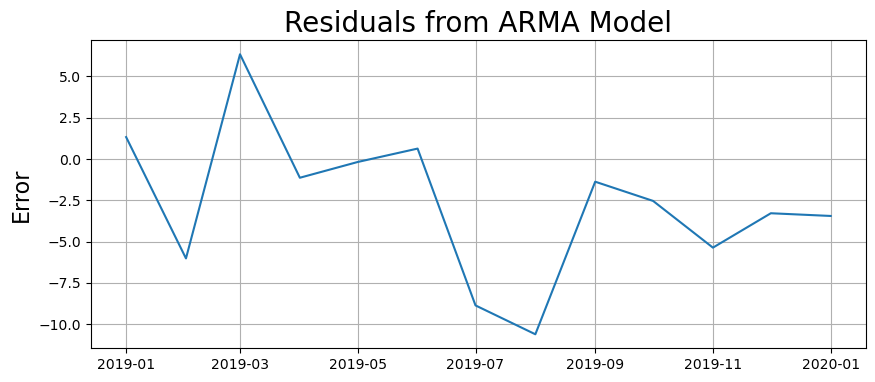

In [34]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.grid()
plt.show()

### ARIMA Model

### ARIMA(1,1,1) modeli için

$Z_t$: tahmin edilmek istenen fark değeri

$\phi$: ar parametreleri

$\theta$: ma parametreleri

$\varepsilon_t$: hata terimi

$Z_t = \phi_1Z_{t-1} + \theta_1\varepsilon_{t-1} + \varepsilon_t$

In [35]:
model = ARIMA(train, order=(13,1,18), enforce_stationarity=False, enforce_invertibility=False)

In [36]:
model_fit = model.fit(method_kwargs={"warn_convergence": False})

In [37]:
#summary of the model
display(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:               ARIMA(13, 1, 18)   Log Likelihood                -229.259
Date:                Sun, 02 Jul 2023   AIC                            522.518
Time:                        23:47:23   BIC                            601.793
Sample:                    01-01-2010   HQIC                           554.456
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0487      1.080     -0.045      0.964      -2.165       2.067
ar.L2          0.0306      0.444      0.069      0.945      -0.839       0.901
ar.L3         -0.4322      0.347     -1.246      0.213      -1.112       0.248
ar.L4         -0.0804      0.539     -0.149      0.881      -1.136       0.975
ar.L5          0.0503      0.454      0.111      0.912      -0.840       0.941
ar.L6         -0.4436      0.341     -1.300      0.194      -1.112       0.225
ar.L7         -0.1175      0.561     -0.210      0.834      -1.216       0.981
ar.L8          0.0514      0.466      0.110      0.912      -0.863       0.965
ar.L9         -0.4191      0.354     -1.185      0.236      -1.112       0.274
ar.L10        -0.0722      0.523     -0.138      0.890      -1.098       0.954
ar.L11         0.0323      0.450      0.072      0.943      -0.851       0.915
ar.L12         0.5151      0.347      1.483      0.138      -0.166       1.196
ar.L13        -0.0140      0.605     -0.023      0.982      -1.199       1.171
ma.L1         -0.5093      1.248     -0.408      0.683      -2.956       1.937
ma.L2          0.1033      0.682      0.151      0.880      -1.233       1.440
ma.L3          0.4993      0.641      0.779      0.436      -0.757       1.756
ma.L4         -0.3128      0.724     -0.432      0.666      -1.731       1.106
ma.L5         -0.0493      0.964     -0.051      0.959      -1.940       1.841
ma.L6          0.3630      0.937      0.388      0.698      -1.473       2.199
ma.L7         -0.3558      0.794     -0.448      0.654      -1.913       1.201
ma.L8         -0.0684      1.065     -0.064      0.949      -2.155       2.019
ma.L9          0.3994      0.670      0.596      0.551      -0.914       1.713
ma.L10         0.0188      0.771      0.024      0.981      -1.493       1.531
ma.L11        -0.3338      0.898     -0.372      0.710      -2.094       1.426
ma.L12        -0.5314      0.875     -0.607      0.544      -2.246       1.183
ma.L13        -0.0202      0.680     -0.030      0.976      -1.353       1.312
ma.L14         0.0649      0.387      0.168      0.867      -0.693       0.823
ma.L15        -0.4339      0.332     -1.305      0.192      -1.085       0.218
ma.L16         0.1703      0.560      0.304      0.761      -0.928       1.269
ma.L17         0.2135      0.272      0.785      0.433      -0.320       0.747
ma.L18        -0.2404      0.416     -0.578      0.563      -1.056       0.575
sigma2         6.2998      6.500      0.969      0.332      -6.440      19.039
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.83   Prob(JB):                         0.60
Heteroskedasticity (H):               0.76   Skew:                             0.26
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.09
========================================================

In [38]:
predictions = model_fit.predict(start = start_date, end = end_date)
residuals = test.production - predictions.values

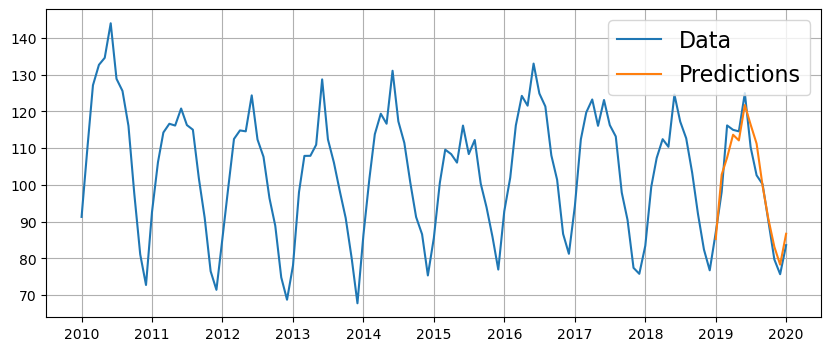

In [39]:
plt.figure(figsize=(10,4))

plt.plot(df_ice_cream.production)
plt.plot(predictions)
plt.grid()
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

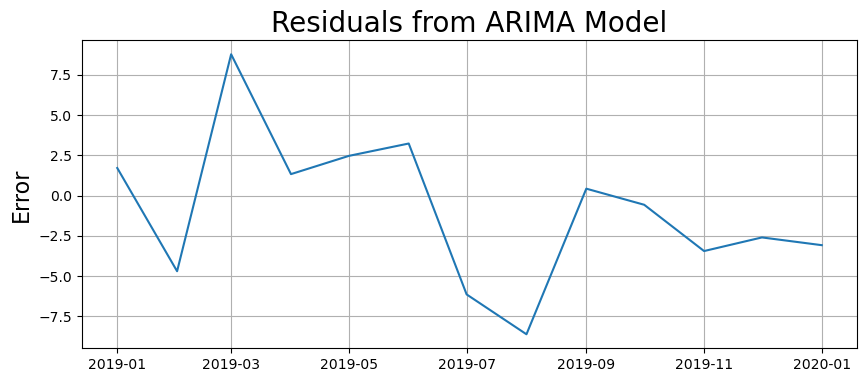

In [40]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.grid()
plt.show()

### Borsa Verileri

In [41]:
import yfinance as yf

In [42]:
#ticker sembolünü belirleyelim
tickerSymbol = 'SPY'

In [43]:
#bu ticker sembolüne ait veriyi çekelim
tickerData = yf.Ticker(tickerSymbol)

In [44]:
#bu ticker için 1 gün aralıklı fiyat verilerini çekelim 
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2023-1-1')

In [45]:
tickerDf = tickerDf[['Close']]

In [46]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.134613
2015-01-05 00:00:00-05:00,172.953751
2015-01-06 00:00:00-05:00,171.324600
2015-01-07 00:00:00-05:00,173.459610
2015-01-08 00:00:00-05:00,176.537613


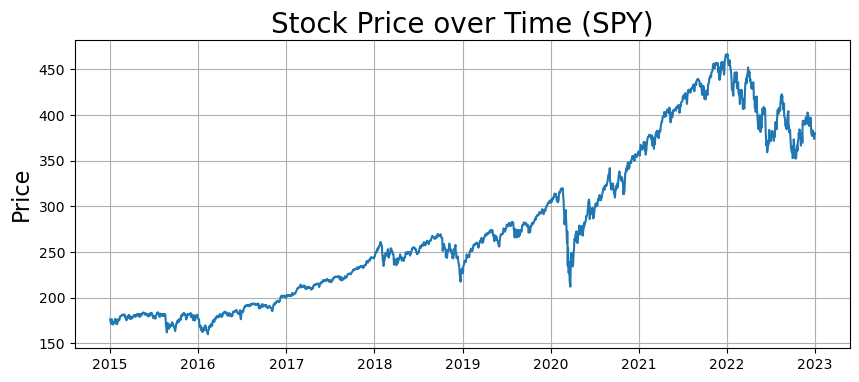

In [47]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.grid()
plt.show()

### Durağanlık(Stationarity): ilk fark alınarak stationarity sağlanmıştır.

In [48]:
#take first difference
first_diffs = tickerDf.diff().dropna()

In [49]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs
tickerDf.dropna(inplace=True)

In [50]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-05 00:00:00-05:00,172.953751,-3.180862
2015-01-06 00:00:00-05:00,171.324600,-1.629150
2015-01-07 00:00:00-05:00,173.459610,2.135010
2015-01-08 00:00:00-05:00,176.537613,3.078003
2015-01-09 00:00:00-05:00,175.122879,-1.414734


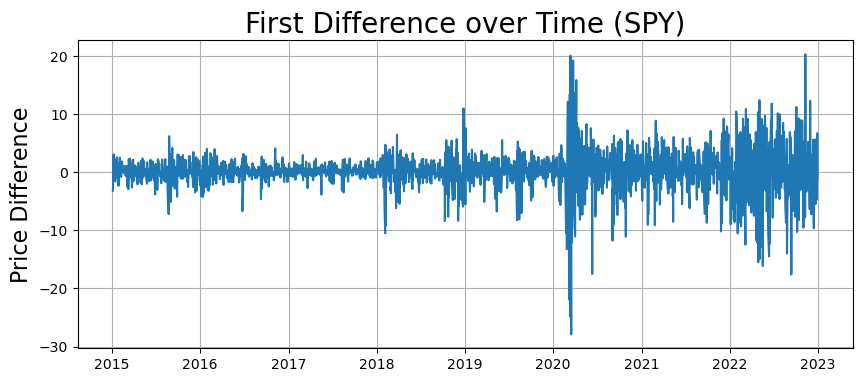

In [51]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
plt.grid()
plt.show()

### ACF

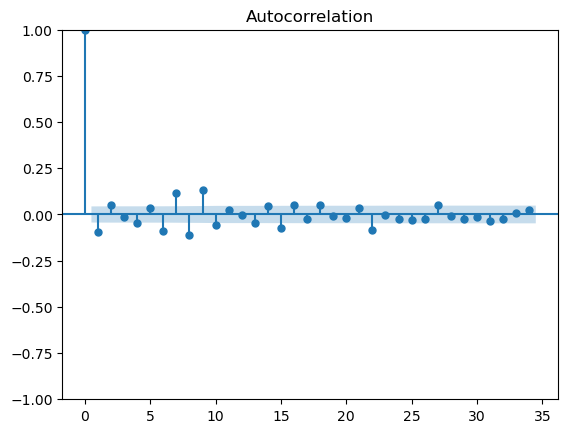

In [52]:
acf_plot = plot_acf(tickerDf.FirstDifference)

#### ACF sonuçları bu sefer o kadar bilgilendirici değil.

### PACF

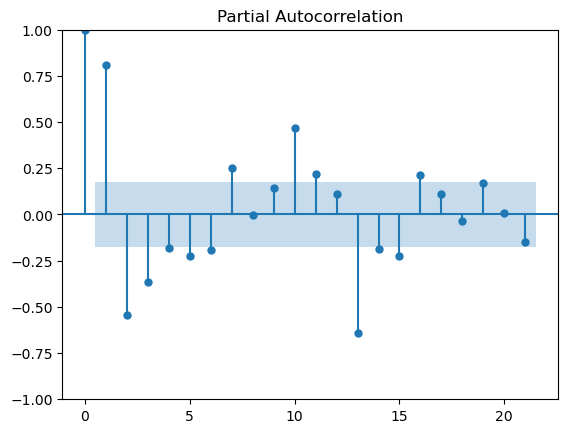

In [53]:
pacf_plot = plot_pacf(df_ice_cream.production, method='yw')

#### PACF daha çok fikir kazandırıyor ama elimizdeki modeller bu bilgileri kullanabilecek mi?.